In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/playground-series-s4e6/sample_submission.csv
/kaggle/input/playground-series-s4e6/train.csv
/kaggle/input/playground-series-s4e6/test.csv


In [2]:
submission_df = pd.read_csv("/kaggle/input/playground-series-s4e6/sample_submission.csv")
train_df = pd.read_csv("/kaggle/input/playground-series-s4e6/train.csv")
test_df = pd.read_csv("/kaggle/input/playground-series-s4e6/test.csv")

### zip file 압축풀기

In [21]:
import shutil
from os import path
import zipfile
from zipfile import ZipFile

In [31]:
origin_path = "C:\\Users\\saint hong\\Downloads\\"
now_path = os.getcwd() + "\\" + "data"

zip_name = "playground-series-s4e6.zip"
zip_path = origin_path + zip_name

with zipfile.ZipFile(zip_path, "r") as obj : 
    zip_files = obj.namelist() # zip 파일에 들어있는 파일 리스트
    if zip_files :
        print(f"~~~ zip files ~~~\n{zip_files}")
        obj.extractall(now_path)
        print(f"~~~ unzip files ~~~\nfiles: {zip_files}\npath: {now_path}")

~~~ zip files ~~~
['sample_submission.csv', 'test.csv', 'train.csv']
~~~ unzip files ~~~
files: ['sample_submission.csv', 'test.csv', 'train.csv']
path: C:\DSS12\010_my_summary\my_project\03_modeling_student\data


In [33]:
submission_df = pd.read_csv("./data/sample_submission.csv")
train_df = pd.read_csv("./data/train.csv")
test_df = pd.read_csv("./data/test.csv")

In [34]:
submission_df.head()

,id,Target
0,76518,Graduate
1,76519,Graduate
2,76520,Graduate
3,76521,Graduate
4,76522,Graduate


In [35]:
train_df.head()

,id,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,0,1,1,1,9238,1,1,126.0,1,1,...,0,6,7,6,12.428571,0,11.1,0.6,2.02,Graduate
1,1,1,17,1,9238,1,1,125.0,1,19,...,0,6,9,0,0.000000,0,11.1,0.6,2.02,Dropout
2,2,1,17,2,9254,1,1,137.0,1,3,...,0,6,0,0,0.000000,0,16.2,0.3,-0.92,Dropout
3,3,1,1,3,9500,1,1,131.0,1,19,...,0,8,11,7,12.820000,0,11.1,0.6,2.02,Enrolled
4,4,1,1,2,9500,1,1,132.0,1,19,...,0,7,12,6,12.933333,0,7.6,2.6,0.32,Graduate


In [36]:
test_df.head()

,id,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
0,76518,1,1,1,9500,1,1,141.0,1,3,...,0,0,8,0,0,0.000000,0,13.9,-0.3,0.79
1,76519,1,1,1,9238,1,1,128.0,1,1,...,0,0,6,6,6,13.500000,0,11.1,0.6,2.02
2,76520,1,1,1,9238,1,1,118.0,1,1,...,0,0,6,11,5,11.000000,0,15.5,2.8,-4.06
3,76521,1,44,1,9147,1,39,130.0,1,1,...,0,3,8,14,5,11.000000,0,8.9,1.4,3.51
4,76522,1,39,1,9670,1,1,110.0,1,1,...,0,0,6,9,4,10.666667,2,7.6,2.6,0.32


## Setting

In [51]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
import pandas as pd
import os

plt.rcParams['figure.dpi'] = 100

sns.set_style(
    style='darkgrid', 
    rc={'axes.facecolor': '.9', 'grid.color': '.8'})
sns.set_palette(palette='deep')
sns_c = sns.color_palette(palette='deep')
sns_c

[(0.2980392156862745, 0.4470588235294118, 0.6901960784313725),
 (0.8666666666666667, 0.5176470588235295, 0.3215686274509804),
 (0.3333333333333333, 0.6588235294117647, 0.40784313725490196),
 (0.7686274509803922, 0.3058823529411765, 0.3215686274509804),
 (0.5058823529411764, 0.4470588235294118, 0.7019607843137254),
 (0.5764705882352941, 0.47058823529411764, 0.3764705882352941),
 (0.8549019607843137, 0.5450980392156862, 0.7647058823529411),
 (0.5490196078431373, 0.5490196078431373, 0.5490196078431373),
 (0.8, 0.7254901960784313, 0.4549019607843137),
 (0.39215686274509803, 0.7098039215686275, 0.803921568627451)]

### UCI 원본 데이터
- feature별 unique 데이터의 meta data 확인을 위한 원본 데이터 임포트
   - unique 데이터의 양식이 다양해서 정리하기 힘듦

In [38]:
pip install ucimlrepo

Note: you may need to restart the kernel to use updated packages.


In [39]:
from ucimlrepo import fetch_ucirepo

student_data = fetch_ucirepo(id=697)
feature_info = student_data.variables
feature_info.head()

,name,role,type,demographic,description,units,missing_values
0,Marital Status,Feature,Integer,Marital Status,1 – single 2 – married 3 – widower 4 – divorce...,None,no
1,Application mode,Feature,Integer,None,1 - 1st phase - general contingent 2 - Ordinan...,None,no
2,Application order,Feature,Integer,None,Application order (between 0 - first choice; a...,None,no
3,Course,Feature,Integer,None,33 - Biofuel Production Technologies 171 - Ani...,None,no
4,Daytime/evening attendance,Feature,Integer,None,1 – daytime 0 - evening,None,no


## EDA

### (1) Data Info

In [40]:
print(f'''
length of train data set : {len(train_df)}
length of test data set : {len(test_df)}
''')


length of train data set : 76518
length of test data set : 51012



In [41]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76518 entries, 0 to 76517
Data columns (total 38 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   id                                              76518 non-null  int64  
 1   Marital status                                  76518 non-null  int64  
 2   Application mode                                76518 non-null  int64  
 3   Application order                               76518 non-null  int64  
 4   Course                                          76518 non-null  int64  
 5   Daytime/evening attendance                      76518 non-null  int64  
 6   Previous qualification                          76518 non-null  int64  
 7   Previous qualification (grade)                  76518 non-null  float64
 8   Nacionality                                     76518 non-null  int64  
 9   Mother's qualification                 

In [42]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51012 entries, 0 to 51011
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   id                                              51012 non-null  int64  
 1   Marital status                                  51012 non-null  int64  
 2   Application mode                                51012 non-null  int64  
 3   Application order                               51012 non-null  int64  
 4   Course                                          51012 non-null  int64  
 5   Daytime/evening attendance                      51012 non-null  int64  
 6   Previous qualification                          51012 non-null  int64  
 7   Previous qualification (grade)                  51012 non-null  float64
 8   Nacionality                                     51012 non-null  int64  
 9   Mother's qualification                 

### (2) Length of Features

In [43]:
print(f'''
length of train data Featrues : {len(train_df.columns)}
length of test data Featrues : {len(test_df.columns)}
''')


length of train data Featrues : 38
length of test data Featrues : 37



In [44]:
print(f'''
train data Featrues - test data Features = {set(train_df.columns).difference(set(test_df.columns))}
''')


train data Featrues - test data Features = {'Target'}



### (3) Describe
- numeric featurea의 경우 스케일링 필요 : mean, std 값이 feature 마다 다름

In [45]:
train_df.describe()

,id,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
count,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,...,76518.00000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000
mean,38258.500000,1.111934,16.054419,1.644410,9001.286377,0.915314,3.658760,132.378766,1.226600,19.837633,...,0.05796,0.137053,5.933414,7.234468,4.007201,9.626085,0.062443,11.520340,1.228218,-0.080921
std,22088.988286,0.441669,16.682337,1.229645,1803.438531,0.278416,8.623774,10.995328,3.392183,15.399456,...,0.40849,0.933830,1.627182,3.503040,2.772956,5.546035,0.462107,2.653375,1.398816,2.251382
min,0.000000,1.000000,1.000000,0.000000,33.000000,0.000000,1.000000,95.000000,1.000000,1.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,19129.250000,1.000000,1.000000,1.000000,9119.000000,1.000000,1.000000,125.000000,1.000000,1.000000,...,0.00000,0.000000,5.000000,6.000000,1.000000,10.000000,0.000000,9.400000,0.300000,-1.700000
50%,38258.500000,1.000000,17.000000,1.000000,9254.000000,1.000000,1.000000,133.100000,1.000000,19.000000,...,0.00000,0.000000,6.000000,7.000000,5.000000,12.142857,0.000000,11.100000,1.400000,0.320000
75%,57387.750000,1.000000,39.000000,2.000000,9670.000000,1.000000,1.000000,140.000000,1.000000,37.000000,...,0.00000,0.000000,6.000000,9.000000,6.000000,13.244048,0.000000,12.700000,2.600000,1.790000
max,76517.000000,6.000000,53.000000,9.000000,9991.000000,1.000000,43.000000,190.000000,109.000000,44.000000,...,12.00000,19.000000,23.000000,33.000000,20.000000,18.000000,12.000000,16.200000,3.700000,3.510000


In [46]:
test_df.describe()

,id,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
count,51012.000000,51012.000000,51012.000000,51012.000000,51012.000000,51012.000000,51012.000000,51012.000000,51012.00000,51012.000000,...,51012.000000,51012.000000,51012.000000,51012.000000,51012.000000,51012.000000,51012.000000,51012.000000,51012.000000,51012.000000
mean,102023.500000,1.109092,16.067102,1.648161,9026.304556,0.918313,3.635007,132.328001,1.20009,19.913275,...,0.057810,0.129283,5.944131,7.274092,4.039697,9.709128,0.063809,11.520611,1.228719,-0.086477
std,14726.040303,0.438084,16.654196,1.235666,1751.328311,0.273889,8.577250,10.885679,3.26473,15.383823,...,0.403434,0.877250,1.599746,3.433149,2.749871,5.496810,0.467176,2.651113,1.402773,2.251650
min,76518.000000,1.000000,1.000000,0.000000,33.000000,0.000000,1.000000,95.000000,1.00000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,89270.750000,1.000000,1.000000,1.000000,9119.000000,1.000000,1.000000,125.000000,1.00000,1.000000,...,0.000000,0.000000,5.000000,6.000000,1.000000,10.000000,0.000000,9.400000,0.300000,-1.700000
50%,102023.500000,1.000000,17.000000,1.000000,9254.000000,1.000000,1.000000,133.100000,1.00000,19.000000,...,0.000000,0.000000,6.000000,8.000000,5.000000,12.166667,0.000000,11.100000,1.400000,0.320000
75%,114776.250000,1.000000,39.000000,2.000000,9670.000000,1.000000,1.000000,139.000000,1.00000,37.000000,...,0.000000,0.000000,6.000000,9.000000,6.000000,13.250000,0.000000,12.700000,2.600000,1.790000
max,127529.000000,6.000000,53.000000,9.000000,9991.000000,1.000000,43.000000,190.000000,109.00000,44.000000,...,12.000000,19.000000,23.000000,33.000000,20.000000,17.714286,10.000000,16.200000,3.700000,3.510000


### (4) Null Data
- null data 없음

In [47]:
print(f'''
null data of train data set : {np.sum(train_df.isnull().sum().values)}
null data of test data set : {np.sum(test_df.isnull().sum().values)}
''')


null data of train data set : 0
null data of test data set : 0



In [48]:
import missingno as msno

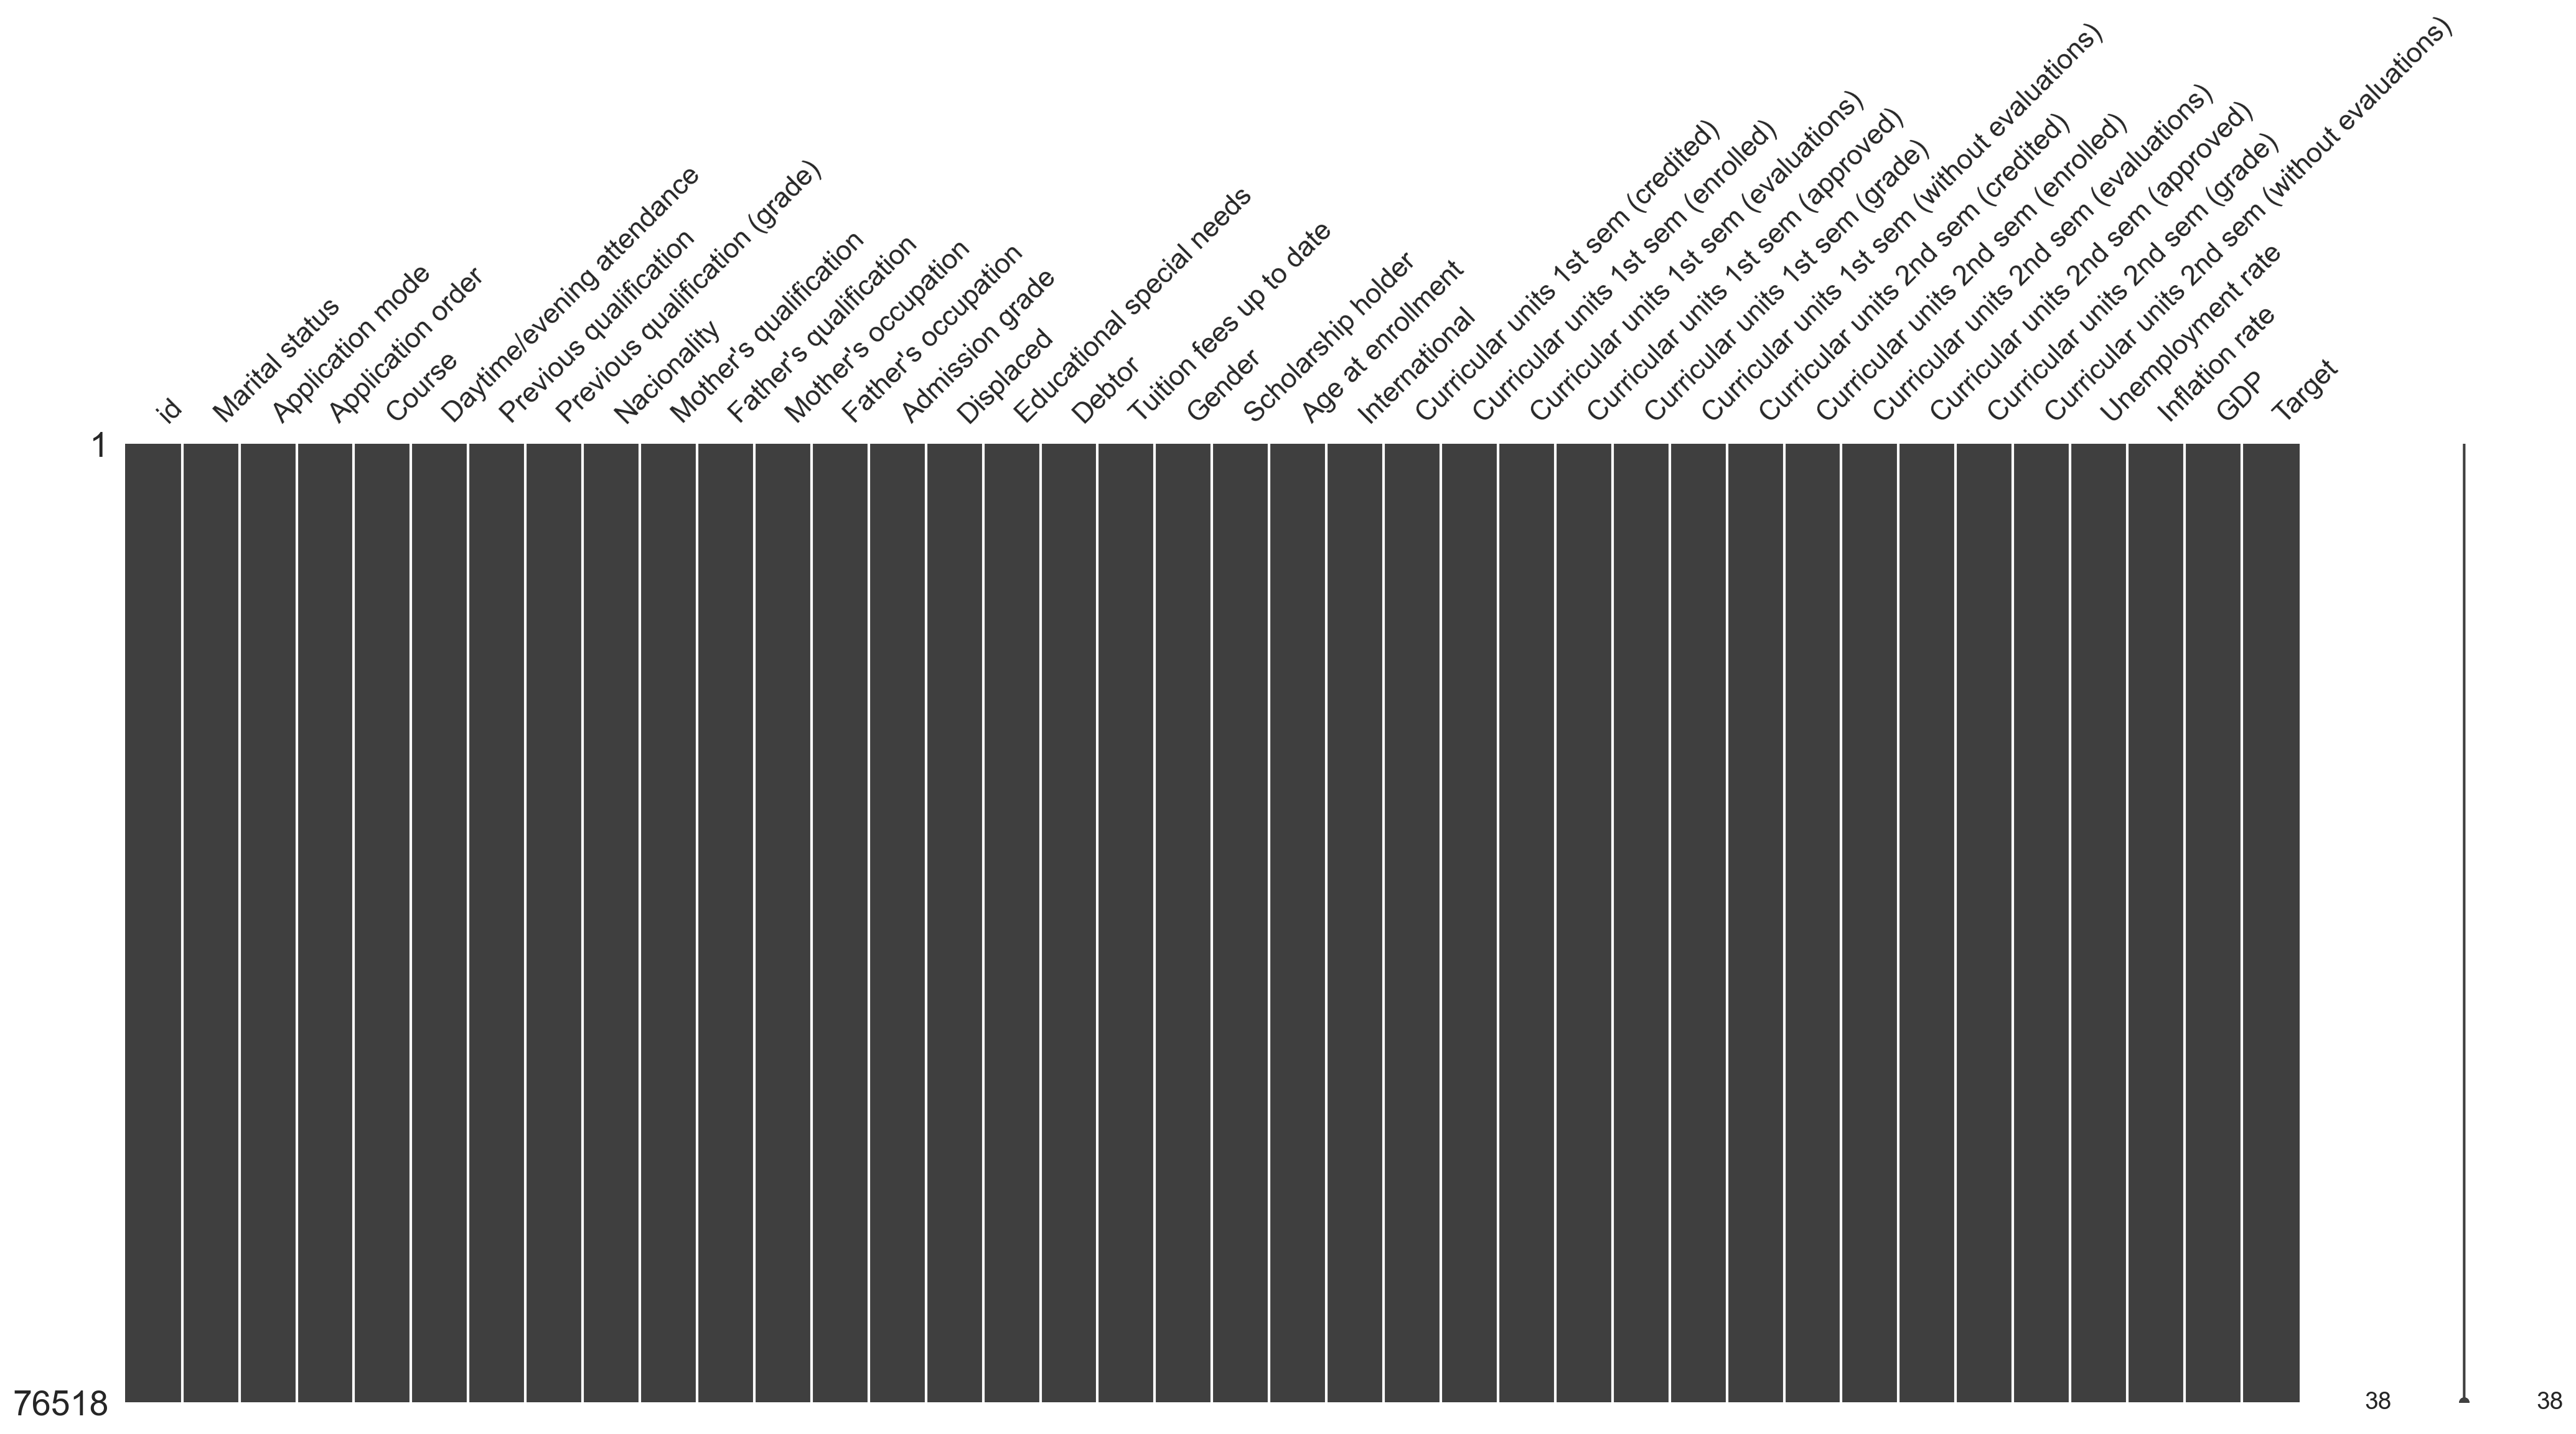

In [53]:
msno.matrix(train_df) ;

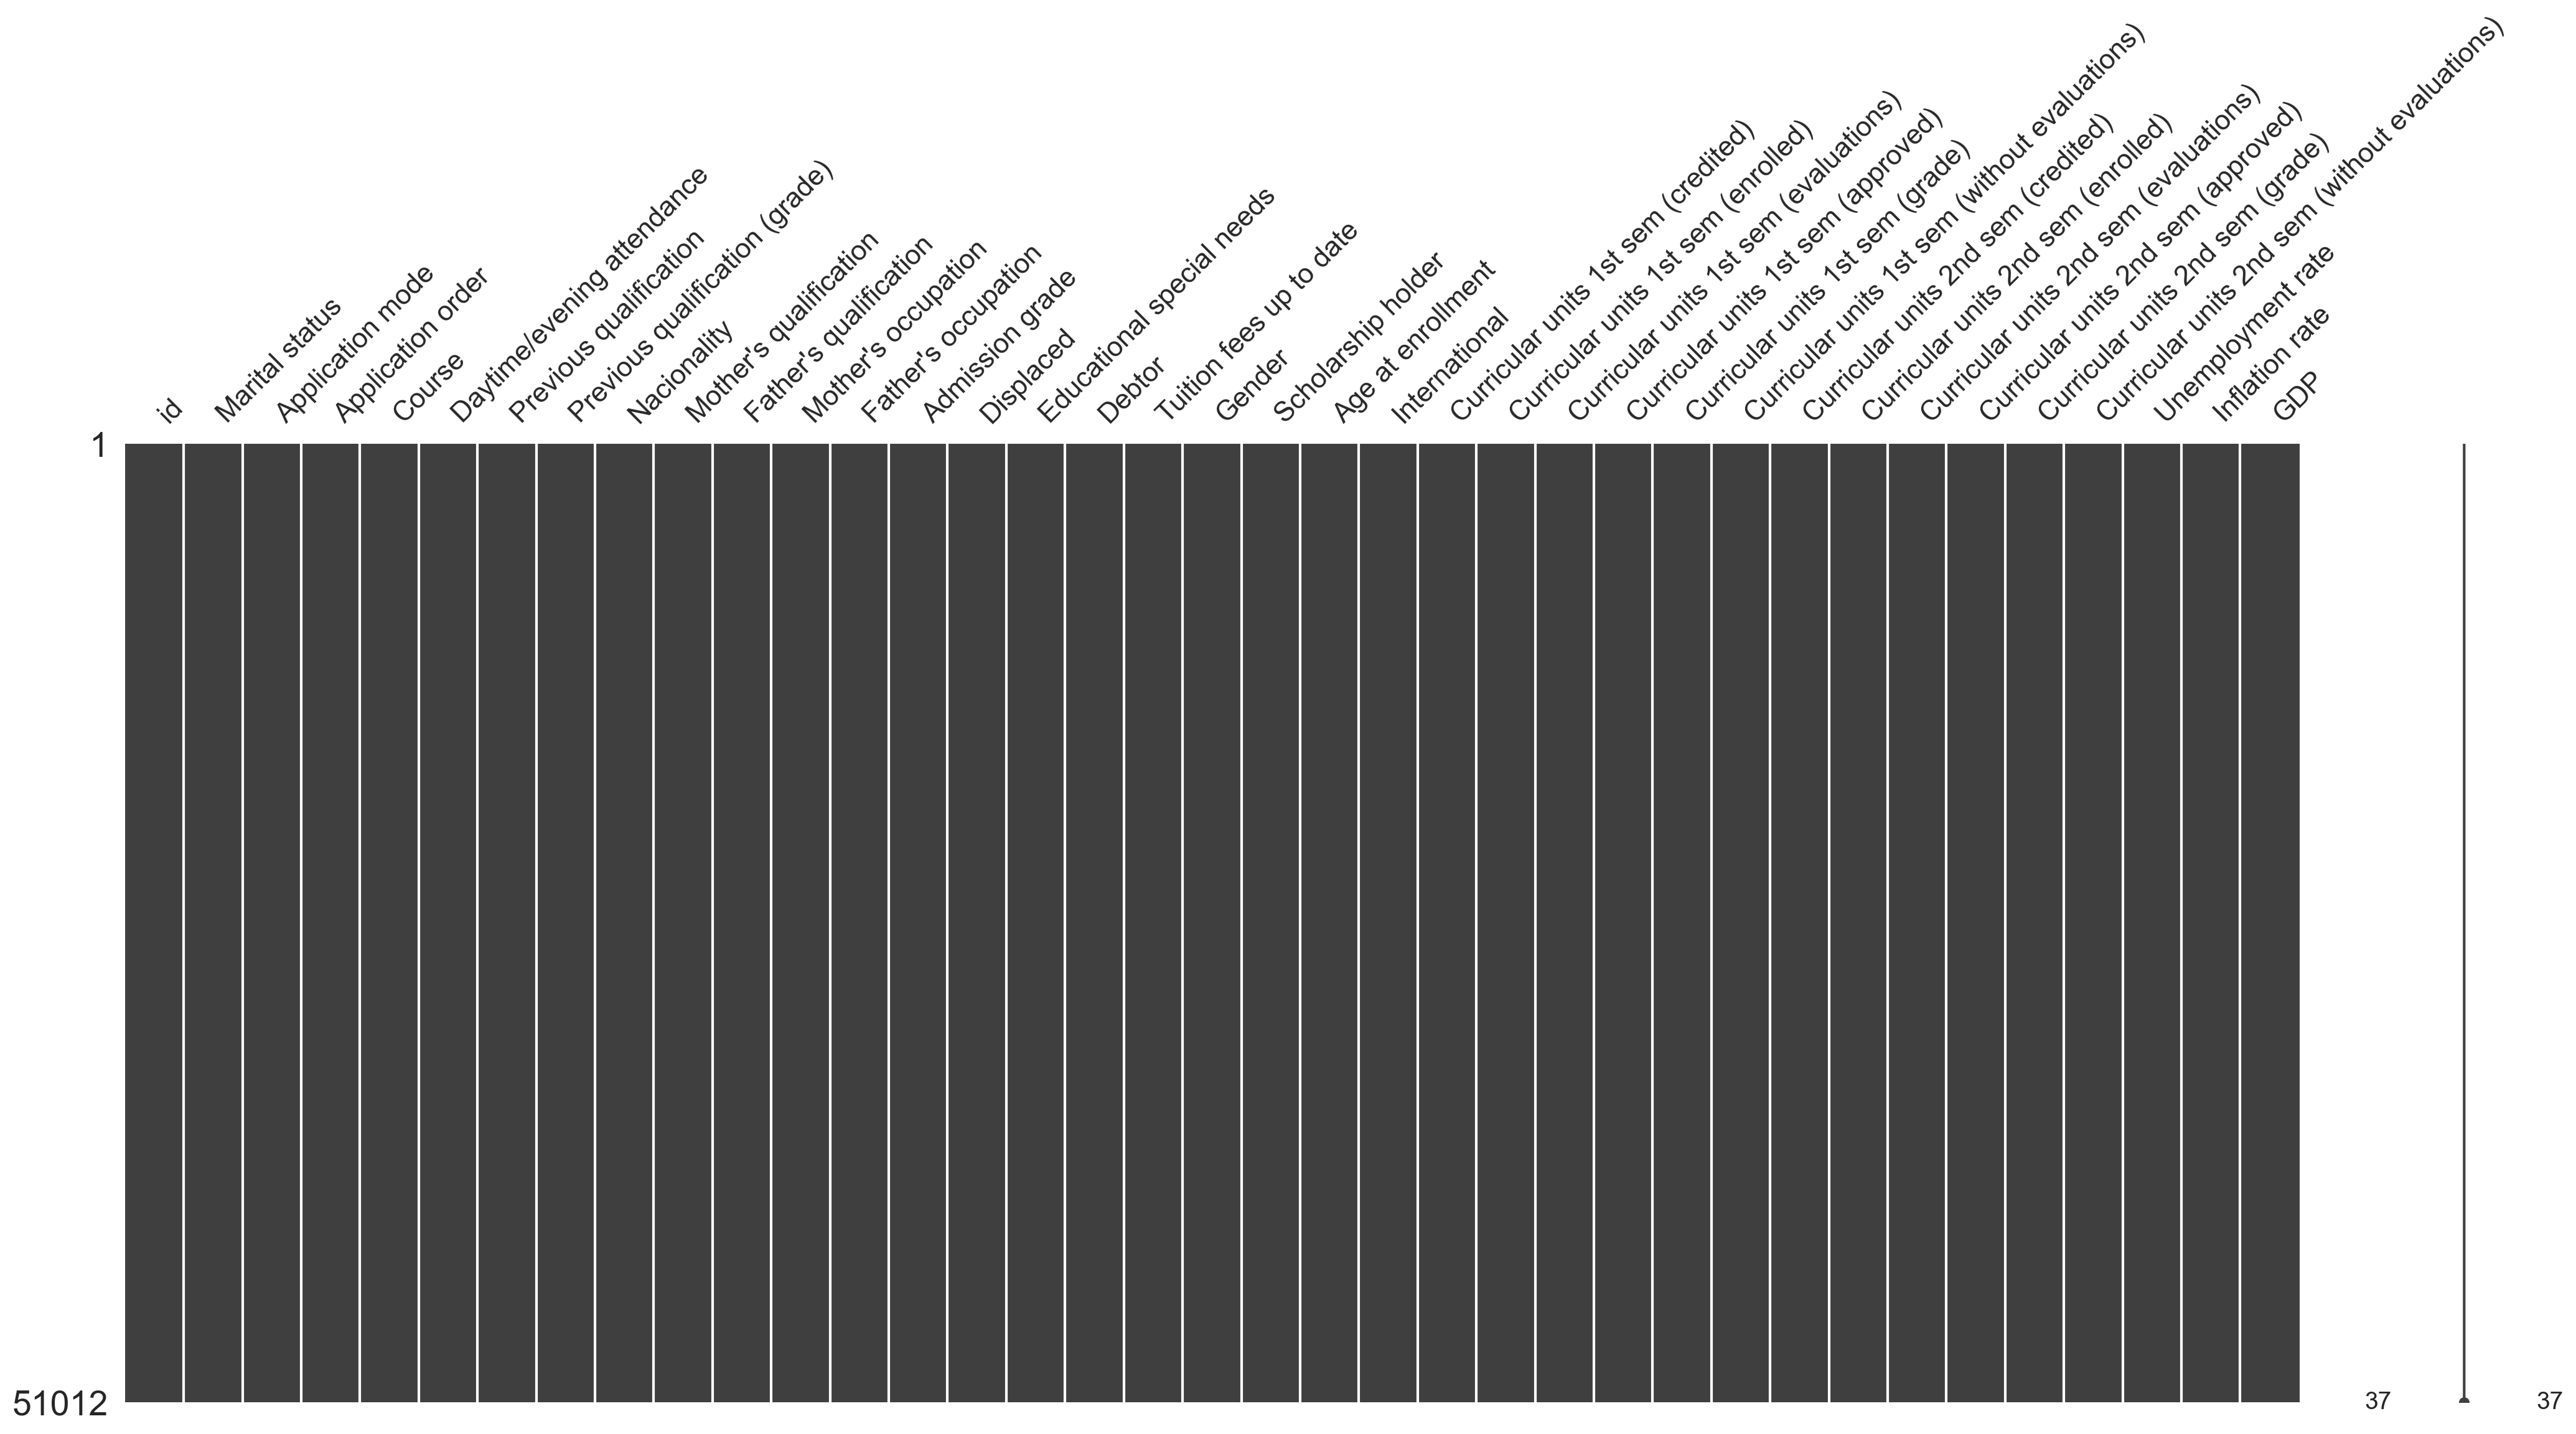

In [54]:
msno.matrix(test_df) ;

### (5) Unique Values
- feature 마다 유니크 값의 갯수가 다르다.
- 대부분 feature가 숫자형 데이터로 이루어져 있으나, 범주형 값을 숫자 데이터로 나타낸 것으로 보인다.
- Target feature의 유니트 데이터
   - Graduate, Dropout, Enrolled
   - **데이터의 종속변수는 다중 클래스에 해당한다.**

In [55]:
unique_values = []
for col in train_df.columns[1:] : 
    cols_unique_val_df = pd.DataFrame(train_df[col].value_counts()).reset_index().assign(col_name=col).rename(columns={col: "unique_val"})
    unique_values.append(cols_unique_val_df)
    
train_unique_df = pd.concat(unique_values, axis=0).reset_index(drop=True)
train_count_unique_df = train_unique_df.groupby("col_name")["unique_val"].count()
train_count_unique_df    

col_name
Admission grade                                    668
Age at enrollment                                   46
Application mode                                    22
Application order                                    8
Course                                              19
Curricular units 1st sem (approved)                 23
Curricular units 1st sem (credited)                 21
Curricular units 1st sem (enrolled)                 24
Curricular units 1st sem (evaluations)              36
Curricular units 1st sem (grade)                  1206
Curricular units 1st sem (without evaluations)      12
Curricular units 2nd sem (approved)                 21
Curricular units 2nd sem (credited)                 20
Curricular units 2nd sem (enrolled)                 22
Curricular units 2nd sem (evaluations)              31
Curricular units 2nd sem (grade)                  1234
Curricular units 2nd sem (without evaluations)      11
Daytime/evening attendance                           2
D

In [56]:
train_df["Target"].unique()

array(['Graduate', 'Dropout', 'Enrolled'], dtype=object)

### (6) Distribution of Features
- numeric_features : 'Previous qualification (grade)','Admission grade','Curricular units 1st sem (grade)','Curricular units 2nd sem (grade)'
- categorical_features : numeric_features 를 제외한 나머지 features
- cate features는 대부분 데이터가 특정 값에 편향되어 있다. : 불균형, 비대칭 데이터로 샘플링을 적용해야 할까?
   - 불균형 문제의 해결방법
      - 언더 샘플링 under sampling : 다수 클래스 데이터 일부만 사용
      - 오버 샘플링 over sampling : 소수 클래스 데이터를 증가 시켜서 사용
      - 복합 샘플링 combining over and under sampling
- 데이터 셋은 실수형 feature, 정수형 feature, 범주형 feature로 이루어져 있다.
   - 나이브 베이즈 모델을 사용하면 데이터의 유형에 따라서 다른 모델로 fitting 한 후 합할 수 있다. 

In [57]:
def get_feature_desc(col) : 
    
    '''
    UCI 패키지에서 feature 별 unique 데이터의 description을 반환하는 함수
    '''
    
    desc = feature_info.query("name == @col")["description"].values[0]
    
    return desc

### feature의 unique data 분포

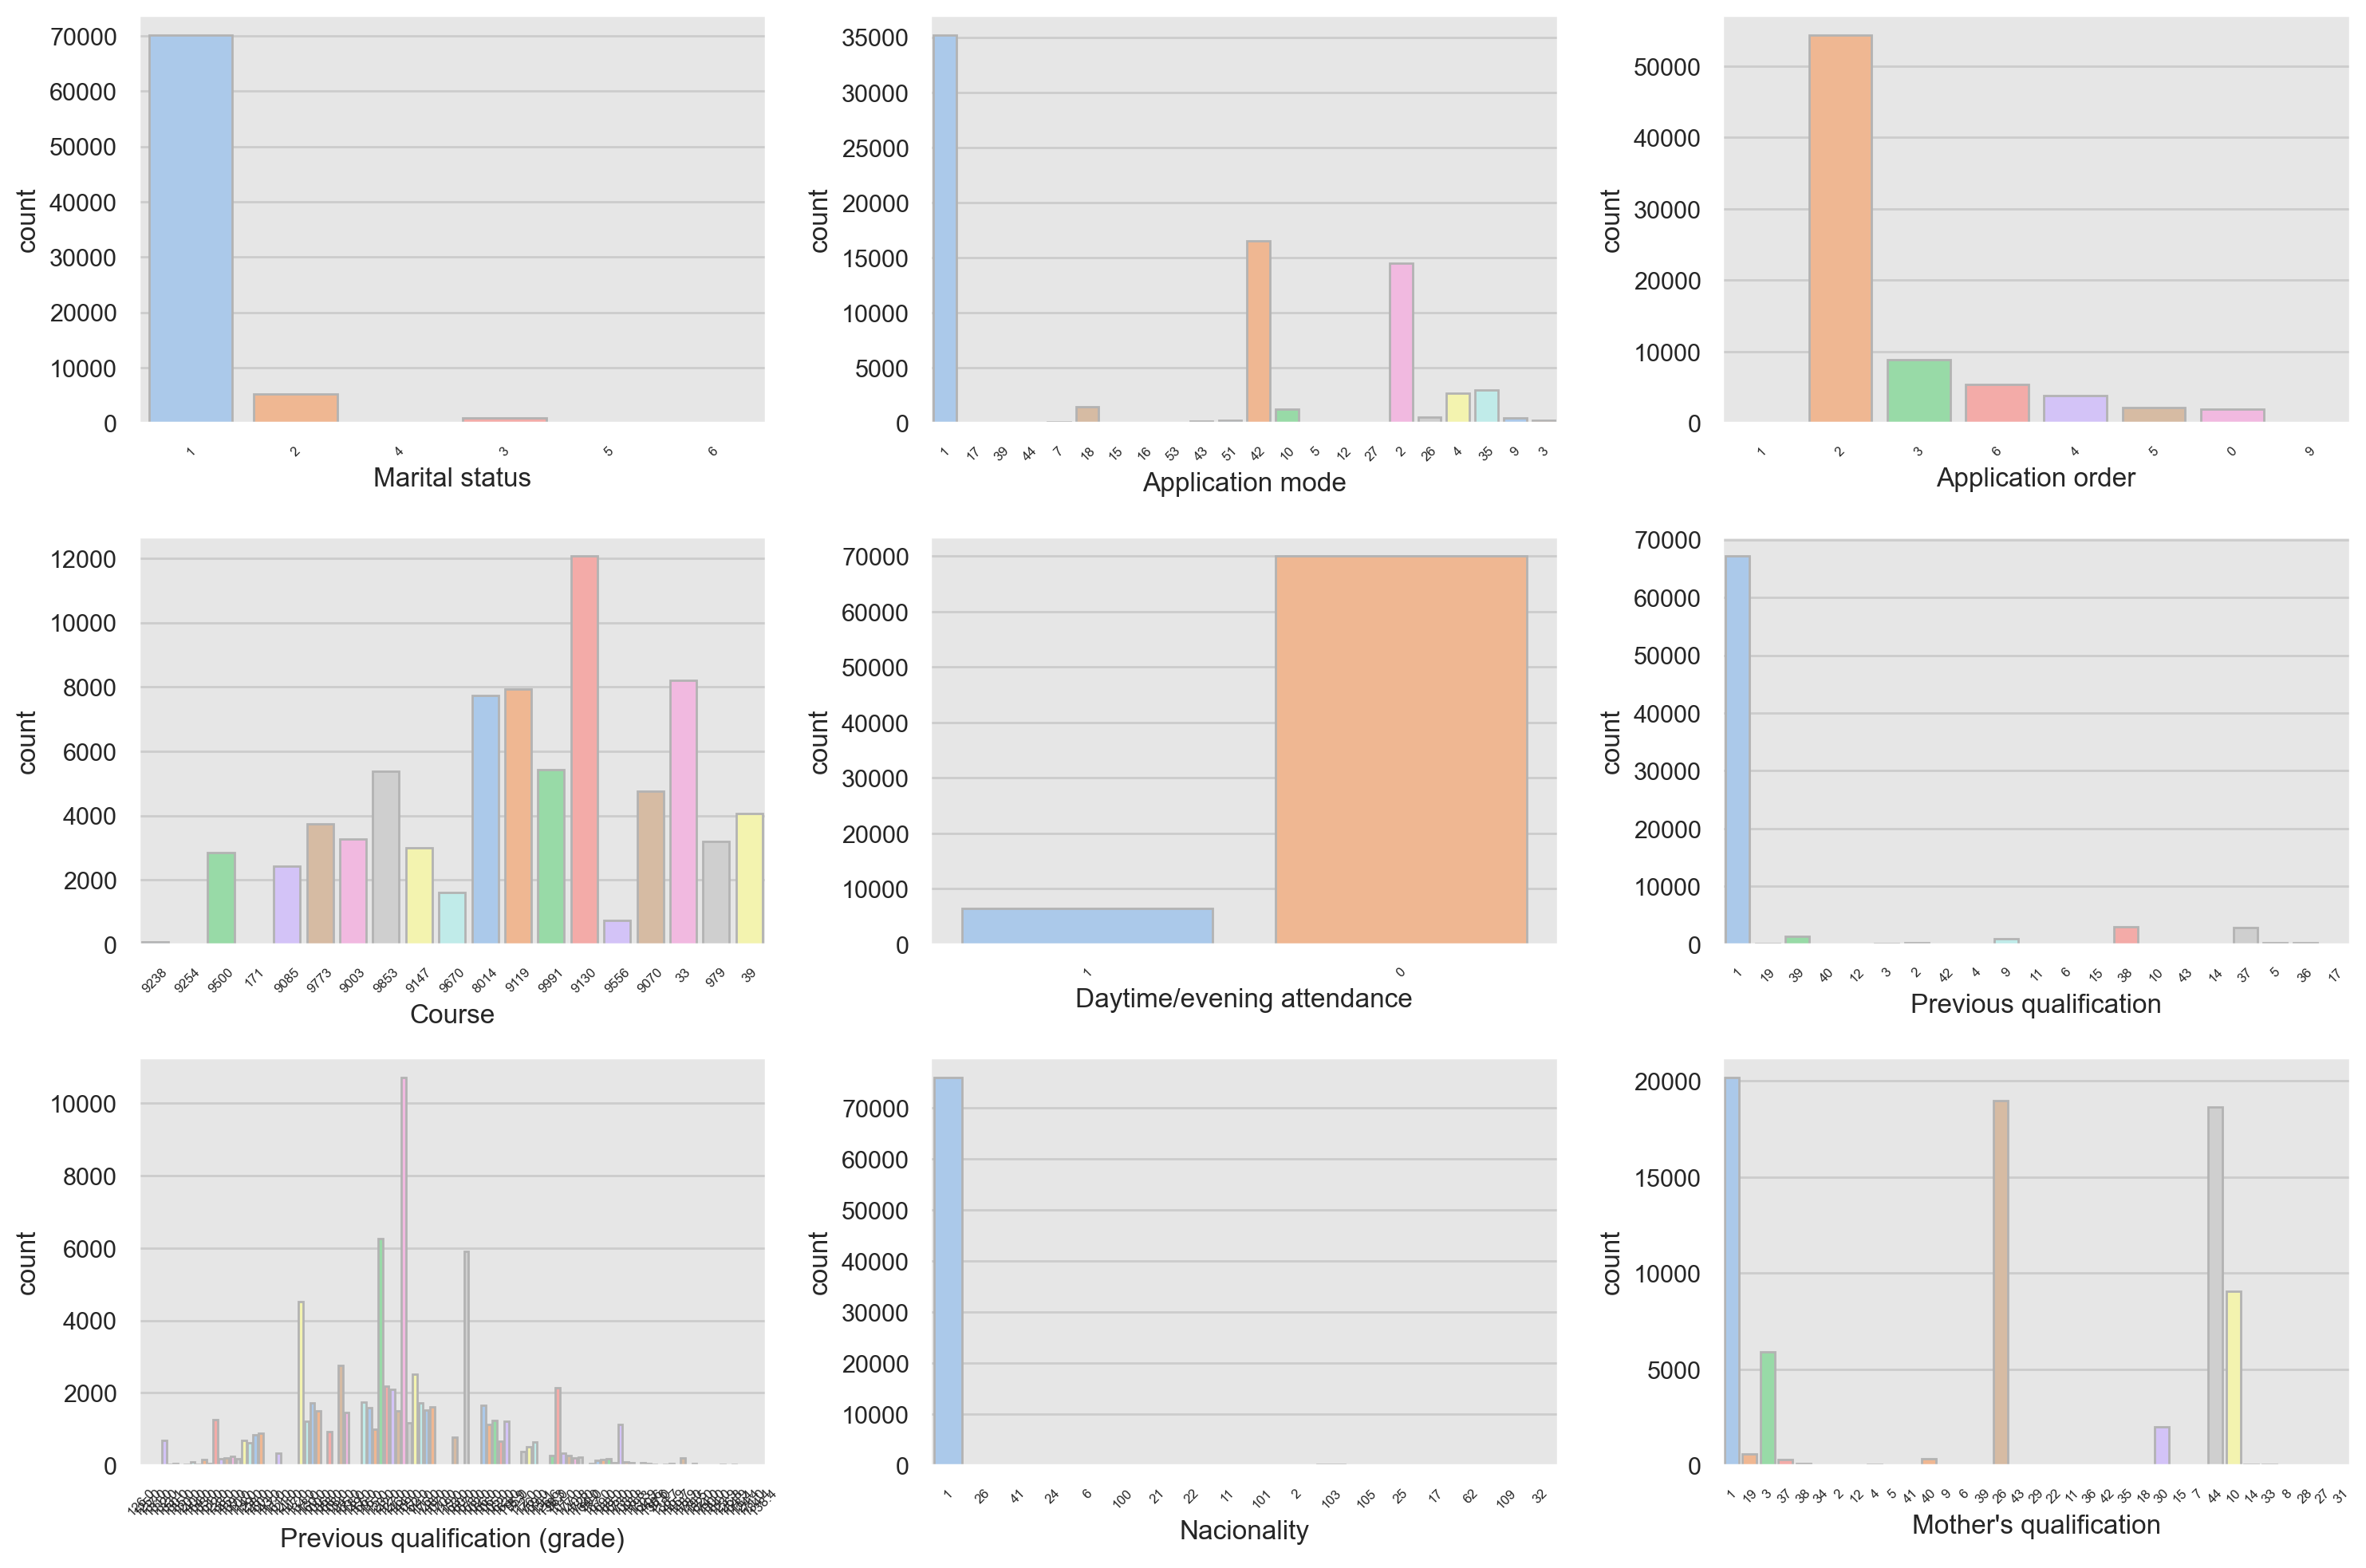

In [58]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 10))
axes = axes.flatten()
for i, col in enumerate(train_df.columns[1:10]) : 
    ax = axes[i]
    g = sns.countplot(
        data=train_df,
        x=col,
        palette="pastel",
        edgecolor=".7",
        ax=ax
    )
    g.set_xticklabels(labels=train_df[col].unique(), rotation=45, fontsize=6, ha="center")
fig.tight_layout() ; 

### unique data desc

In [60]:
get_feature_desc("Marital Status")

'1 – single 2 – married 3 – widower 4 – divorced 5 – facto union 6 – legally separated'

In [61]:
get_feature_desc("Course")

'33 - Biofuel Production Technologies 171 - Animation and Multimedia Design 8014 - Social Service (evening attendance) 9003 - Agronomy 9070 - Communication Design 9085 - Veterinary Nursing 9119 - Informatics Engineering 9130 - Equinculture 9147 - Management 9238 - Social Service 9254 - Tourism 9500 - Nursing 9556 - Oral Hygiene 9670 - Advertising and Marketing Management 9773 - Journalism and Communication 9853 - Basic Education 9991 - Management (evening attendance)'

In [62]:
get_feature_desc("Nacionality")

'1 - Portuguese; 2 - German; 6 - Spanish; 11 - Italian; 13 - Dutch; 14 - English; 17 - Lithuanian; 21 - Angolan; 22 - Cape Verdean; 24 - Guinean; 25 - Mozambican; 26 - Santomean; 32 - Turkish; 41 - Brazilian; 62 - Romanian; 100 - Moldova (Republic of); 101 - Mexican; 103 - Ukrainian; 105 - Russian; 108 - Cuban; 109 - Colombian'

### 실수형 데이터를 가진 feature

In [77]:
train_df[["Previous qualification (grade)"]].describe()

,Previous qualification (grade)
count,76518.000000
mean,132.378766
std,10.995328
min,95.000000
25%,125.000000
50%,133.100000
75%,140.000000
max,190.000000


In [75]:
numeric_features = ["Previous qualification (grade)"]
numeric_features

['Previous qualification (grade)']

### feature의 unique data 분포

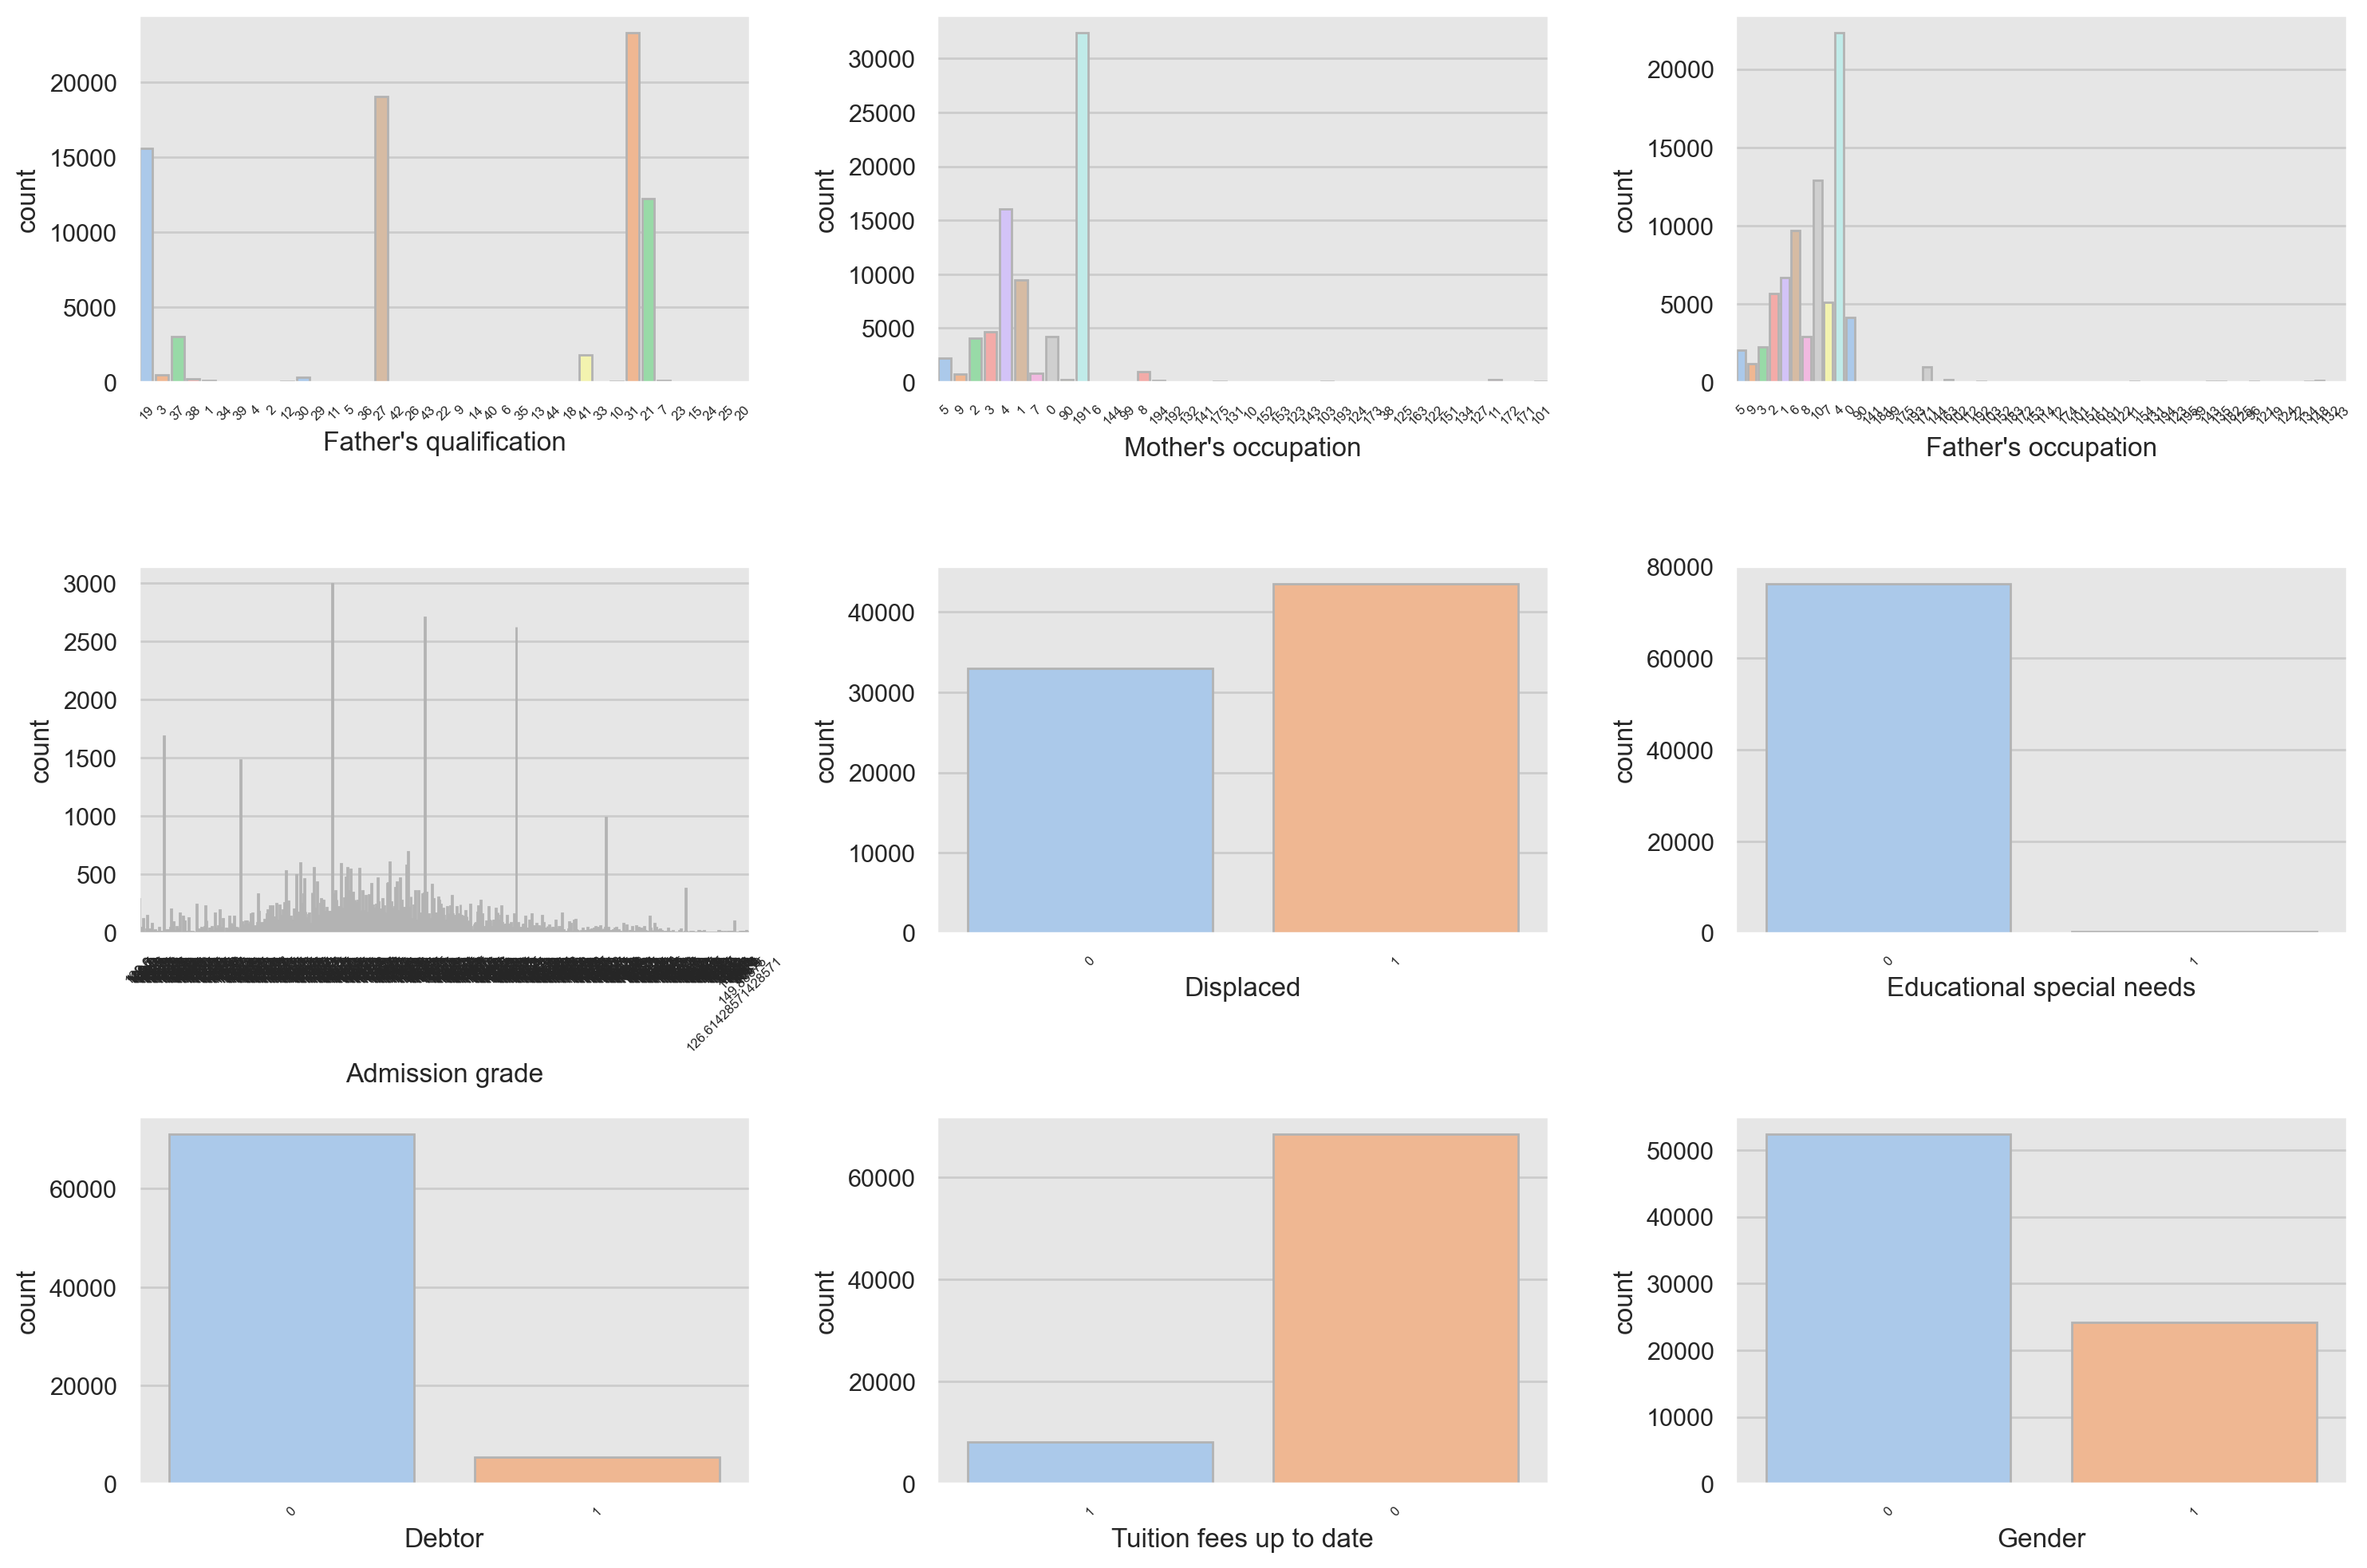

In [59]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 10))
axes = axes.flatten()
for i, col in enumerate(train_df.columns[10:19]) : 
    ax = axes[i]
    g = sns.countplot(
        data=train_df,
        x=col,
        palette="pastel",
        edgecolor=".7",
        ax=ax
    )
    g.set_xticklabels(labels=train_df[col].unique(), rotation=45, fontsize=6, ha="center")
fig.tight_layout() ; 

### unique data desc

In [63]:
# 어머니의 직업

get_feature_desc("Mother's occupation")

'0 - Student 1 - Representatives of the Legislative Power and Executive Bodies, Directors, Directors and Executive Managers 2 - Specialists in Intellectual and Scientific Activities 3 - Intermediate Level Technicians and Professions 4 - Administrative staff 5 - Personal Services, Security and Safety Workers and Sellers 6 - Farmers and Skilled Workers in Agriculture, Fisheries and Forestry 7 - Skilled Workers in Industry, Construction and Craftsmen 8 - Installation and Machine Operators and Assembly Workers 9 - Unskilled Workers 10 - Armed Forces Professions 90 - Other Situation 99 - (blank) 122 - Health professionals 123 - teachers 125 - Specialists in information and communication technologies (ICT) 131 - Intermediate level science and engineering technicians and professions 132 - Technicians and professionals, of intermediate level of health 134 - Intermediate level technicians from legal, social, sports, cultural and similar services 141 - Office workers, secretaries in general and 

In [64]:
# 난민여부

get_feature_desc("Displaced")

'1 – yes 0 – no'

In [66]:
# 채무여부

get_feature_desc("Debtor")

'1 – yes 0 – no'

### 실수형 데이터를 가진 feature

In [79]:
train_df["Admission grade"].describe()

count    76518.000000
mean       125.363971
std         12.562328
min         95.000000
25%        118.000000
50%        124.600000
75%        132.000000
max        190.000000
Name: Admission grade, dtype: float64

In [76]:
numeric_features.append("Admission grade")
numeric_features

['Previous qualification (grade)', 'Admission grade']

### feature의 unique data 분포

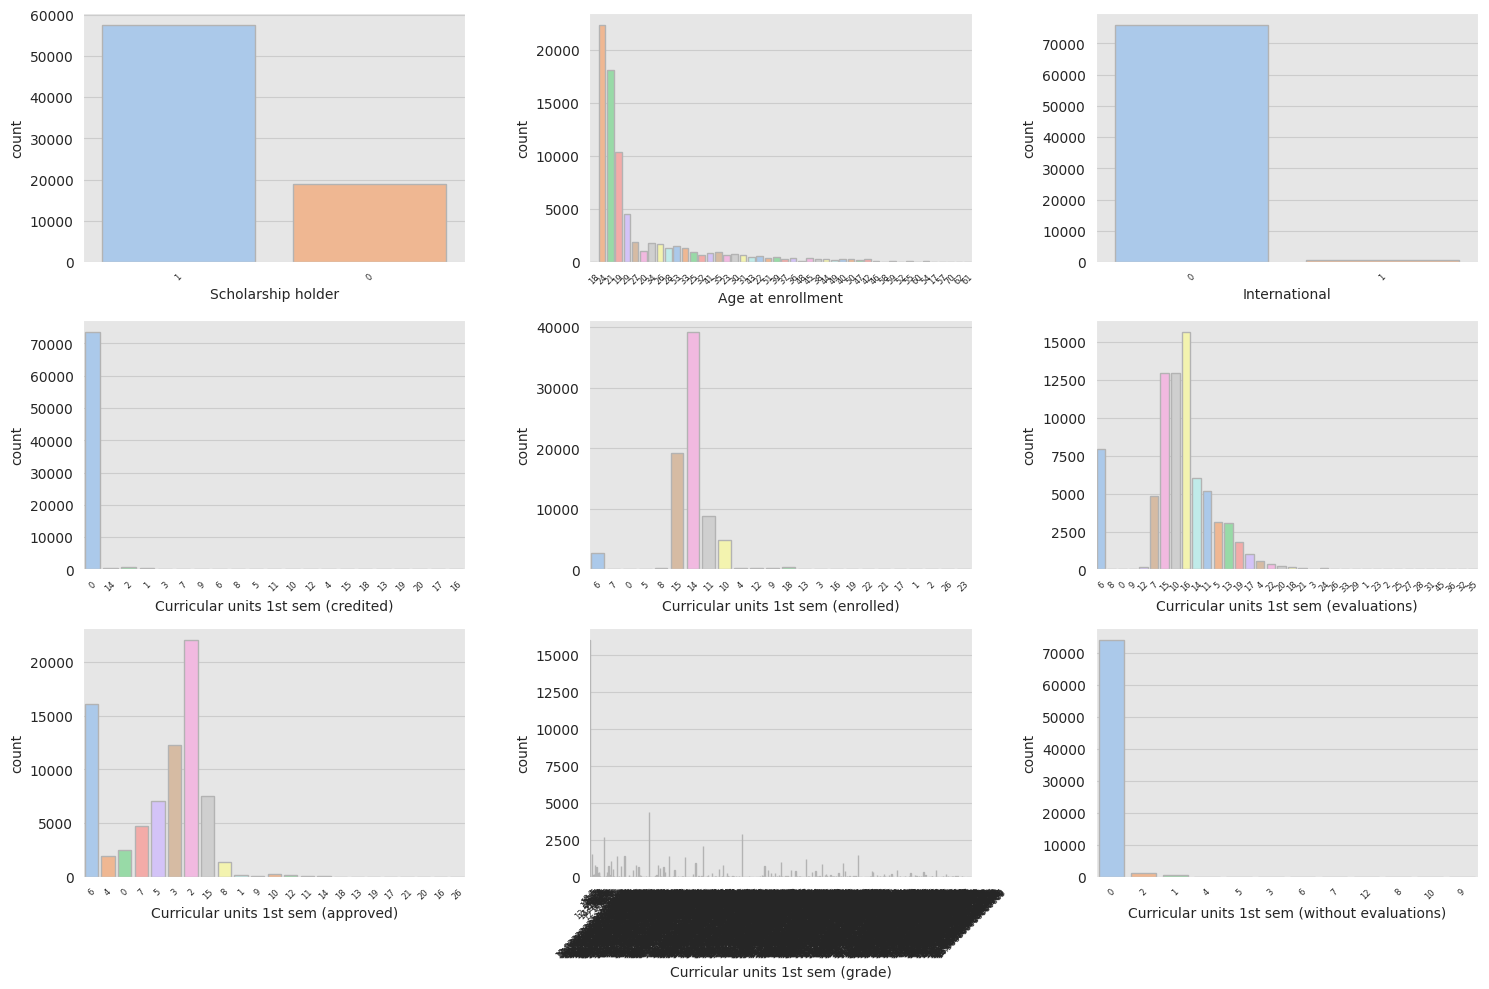

In [51]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 10))
axes = axes.flatten()
for i, col in enumerate(train_df.columns[19:28]) : 
    ax = axes[i]
    g = sns.countplot(
        data=train_df,
        x=col,
        palette="pastel",
        edgecolor=".7",
        ax=ax
    )
    g.set_xticklabels(labels=train_df[col].unique(), rotation=45, fontsize=6, ha="center")
fig.tight_layout() ; 

### unique data desc

In [67]:
# 학위소지 여부

get_feature_desc("Scholarship holder")

'1 – yes 0 – no'

In [68]:
# 외국인 여부

get_feature_desc("International")

'1 – yes 0 – no'

In [69]:
# 교과단위 1학기의 학점

get_feature_desc("Curricular units 1st sem (credited)")

'Number of curricular units credited in the 1st semester'

### 실수형 데이터를 가진 feature

In [110]:
train_df["Curricular units 1st sem (grade)"]

0        14.500000
1        11.600000
2         0.000000
3        12.591250
4        12.933333
           ...    
76513    10.666667
76514    13.000000
76515    12.500000
76516     0.000000
76517    12.833333
Name: Curricular units 1st sem (grade), Length: 76518, dtype: float64

In [91]:
# 정규표현식을 사용하여 컬럼 조회 : train_df.filter(regex="^Curricular.*1st.*(grade)")

train_df["Curricular units 1st sem (grade)"].describe()

count    76518.000000
mean         9.995862
std          5.264224
min          0.000000
25%         10.666667
50%         12.166667
75%         13.314286
max         18.875000
Name: Curricular units 1st sem (grade), dtype: float64

In [92]:
# unique data : 1206

train_count_unique_df["Curricular units 1st sem (grade)"]

1206

In [77]:
numeric_features.append("Curricular units 1st sem (grade)")
numeric_features

['Previous qualification (grade)',
 'Admission grade',
 'Curricular units 1st sem (grade)']

### feature의 unique data 분포

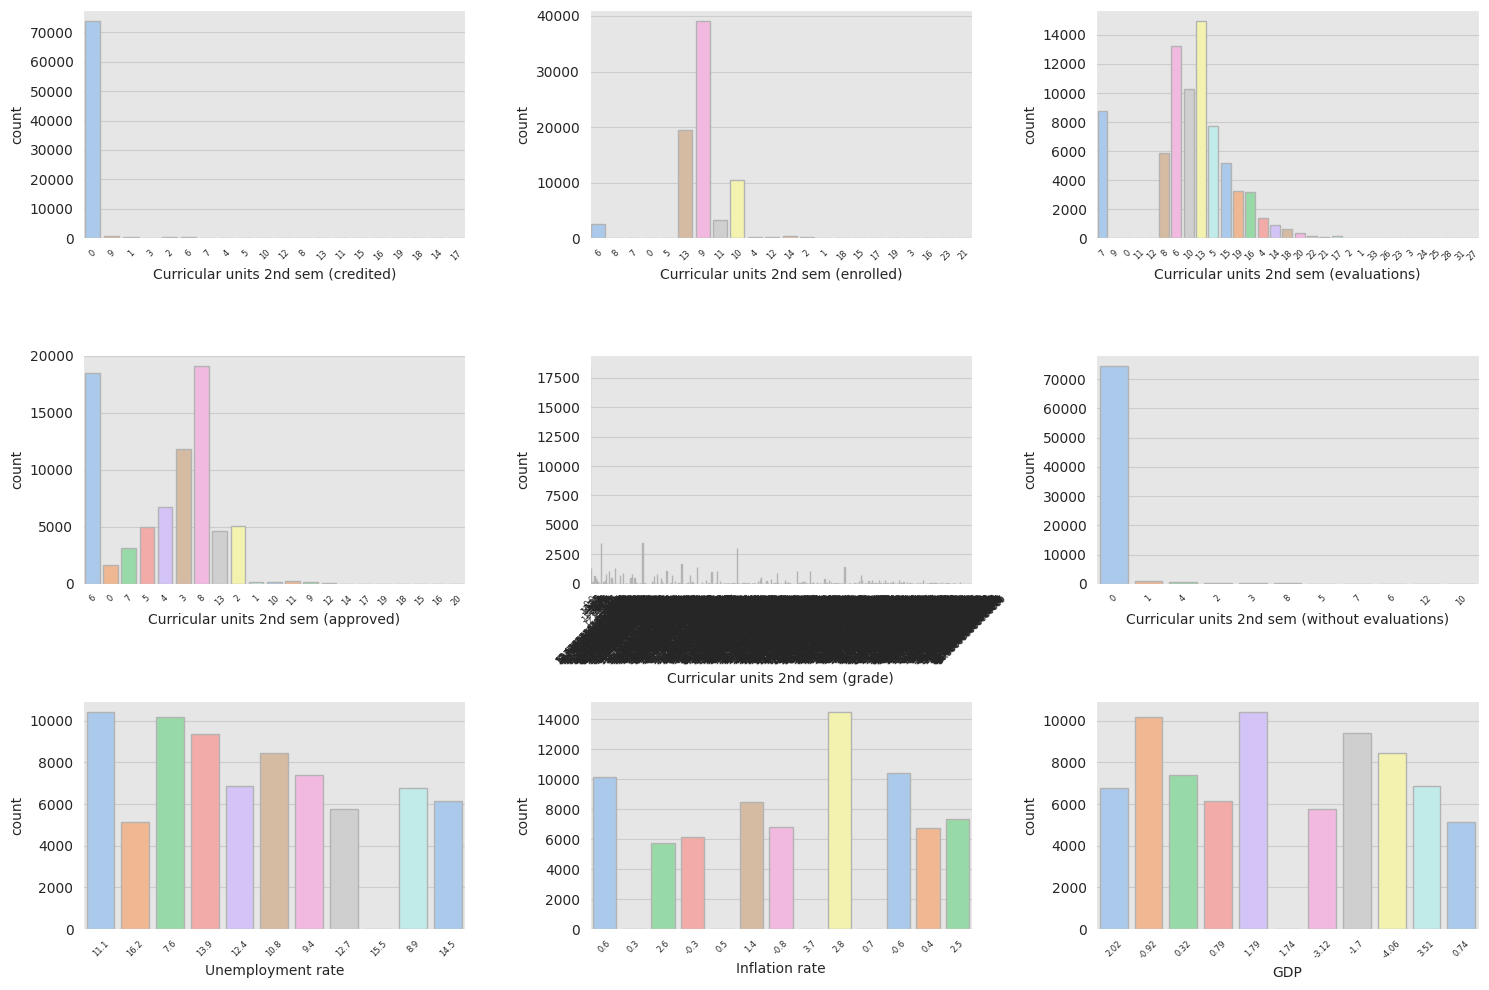

In [52]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 10))
axes = axes.flatten()
for i, col in enumerate(train_df.columns[28:37]) : 
    ax = axes[i]
    g = sns.countplot(
        data=train_df,
        x=col,
        palette="pastel",
        edgecolor=".7",
        ax=ax
    )
    g.set_xticklabels(labels=train_df[col].unique(), rotation=45, fontsize=6, ha="center")
fig.tight_layout() ; 

### unique data desc

In [70]:
get_feature_desc("Unemployment rate")

'Unemployment rate (%)'

In [71]:
get_feature_desc("Inflation rate")

'Inflation rate (%)'

In [72]:
get_feature_desc("GDP")

'GDP'

### 실수형 데이터를 가진 feature

In [12]:
# train_df.filter(regex="^Curr.*2.*(grade)")

train_df["Curricular units 2nd sem (grade)"].describe()

count    76518.000000
mean         9.626085
std          5.546035
min          0.000000
25%         10.000000
50%         12.142857
75%         13.244048
max         18.000000
Name: Curricular units 2nd sem (grade), dtype: float64

In [13]:
train_count_unique_df["Curricular units 2nd sem (grade)"]

1234

In [78]:
numeric_features.append("Curricular units 2nd sem (grade)")
numeric_features

['Previous qualification (grade)',
 'Admission grade',
 'Curricular units 1st sem (grade)',
 'Curricular units 2nd sem (grade)']

### Target feature의 unique 데이터 분포
- 멀티 카테고리형 feature

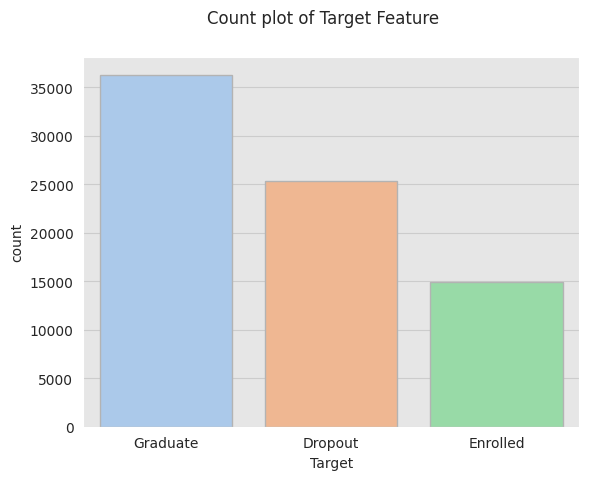

In [19]:
fig, ax = plt.subplots()
sns.countplot(
    data=train_df,
    x="Target",
    palette="pastel",
    edgecolor=".7"
) 
fig.suptitle("Count plot of Target Feature");

In [80]:
train_df[numeric_features]

,Previous qualification (grade),Admission grade,Curricular units 1st sem (grade),Curricular units 2nd sem (grade)
0,126.0,122.6,14.500000,12.428571
1,125.0,119.8,11.600000,0.000000
2,137.0,144.7,0.000000,0.000000
3,131.0,126.1,12.591250,12.820000
4,132.0,120.1,12.933333,12.933333
...,...,...,...,...
76513,121.0,116.5,10.666667,10.600000
76514,125.0,131.6,13.000000,13.875000
76515,138.0,123.3,12.500000,11.400000
76516,136.0,124.8,0.000000,0.000000


### numeric, categorical features

In [97]:
np.sort(train_df[numeric_features[3]].unique())

array([ 0.        ,  1.        ,  2.2       , ..., 17.69230769,
       17.71428571, 18.        ])

In [91]:
train_df[numeric_features].describe()

,Previous qualification (grade),Admission grade,Curricular units 1st sem (grade),Curricular units 2nd sem (grade)
count,76518.000000,76518.000000,76518.000000,76518.000000
mean,132.378766,125.363971,9.995862,9.626085
std,10.995328,12.562328,5.264224,5.546035
min,95.000000,95.000000,0.000000,0.000000
25%,125.000000,118.000000,10.666667,10.000000
50%,133.100000,124.600000,12.166667,12.142857
75%,140.000000,132.000000,13.314286,13.244048
max,190.000000,190.000000,18.875000,18.000000


In [89]:
train_count_unique_df[numeric_features]

col_name
Previous qualification (grade)       110
Admission grade                      668
Curricular units 1st sem (grade)    1206
Curricular units 2nd sem (grade)    1234
Name: unique_val, dtype: int64

In [87]:
train_count_unique_df.to_frame().sort_values("unique_val", ascending=False)

,unique_val
col_name,
Curricular units 2nd sem (grade),1234
Curricular units 1st sem (grade),1206
Admission grade,668
Previous qualification (grade),110
Father's occupation,56
Age at enrollment,46
Mother's occupation,40
Father's qualification,39
Curricular units 1st sem (evaluations),36


### (6) Correlation

In [22]:
# Target data Encoded

mapper = {"Graduate": 0, "Dropout": 1, "Enrolled": 2}
encoded_target = train_df["Target"].map(mapper)
encoded_target.unique()

array([0, 1, 2])

In [23]:
# train data set copy

temp_train_df = train_df.copy()
temp_train_df["Target"] = encoded_target
temp_train_df = temp_train_df.drop(["id"], axis=1) # data index remove
temp_train_df["Target"].unique()

array([0, 1, 2])

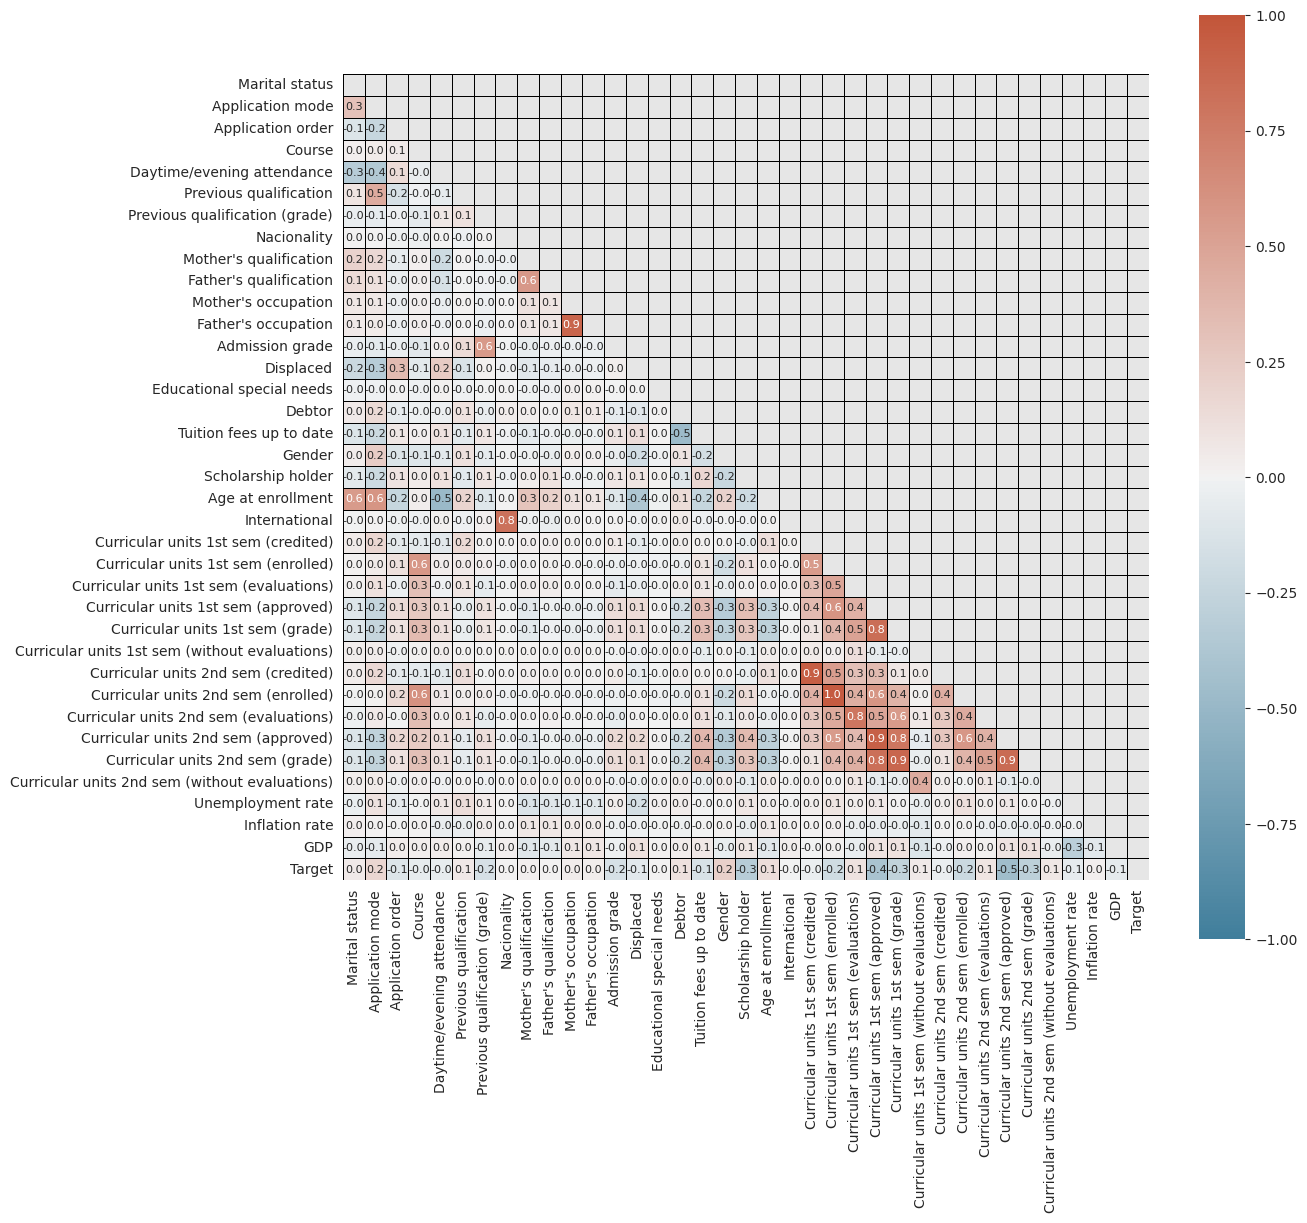

In [24]:
corr_df = temp_train_df.corr()

cmap = sns.diverging_palette(230, 20, as_cmap=True)
mask = np.triu(np.ones_like(corr_df, dtype=bool))

fig, ax = plt.subplots(figsize=(13, 12))
sns.heatmap(
    data=corr_df,
    mask=mask,
    cmap=cmap,
    vmax=1.0,
    vmin=-1.0,
    center=0,
    square=True,
    linewidths=0.5,
    linecolor="k",
    annot=True,
    annot_kws={"fontsize": 8},
    fmt=".1f",
    ax=ax
) 
ax.grid(False) ; 